In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 분류 tree
from sklearn.tree import DecisionTreeClassifier
# 회귀 tree
from sklearn.tree import DecisionTreeRegressor

# 분류 KNN
from sklearn.neighbors import KNeighborsClassifier
# 회귀 KNN
from sklearn.neighbors import KNeighborsRegressor

import matplotlib.pyplot as plt
import numpy as np
# 교차검증을 위한 라이브러리
from sklearn.model_selection import cross_val_score

# 1. 문제 정의
 - 버섯의 특징을 활용해 독/식용 버섯 분류
 - Decision tree 시각화 & 과대적합 제어
 - 특성의 중요도 확인

# 2. 데이터 수집

In [6]:
mush = pd.read_csv('mushroom.csv')
mush.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# 3. 데이터 전처리
 - info : 결측치, 데이터 타입
 - describe : 이상치 확인
 - 이상치를 확인할 땐 데이터가 수치형 데이터여야함

In [7]:
# 결측치 파악
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
# 이상치 확인
# count : 데이터 갯수
# unique : 중복을 제거한 데이터 갯수
# top : 가장 많은 비율을 차지하는 데이터 갯수
# freq : top의 실제 데이터
mush.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
X=mush.loc[:,'cap-shape':]
y=mush.loc[:,'poisonous']

In [10]:
print(X.shape)
print(y.shape)

(8124, 22)
(8124,)


In [11]:
len(X[X.columns[0]].unique())

6

In [12]:
sum1=0
for i in X.columns:
    sum1+=len(X[i].unique())
print(sum1)

117


In [13]:
# 원핫인코딩
# 문자형 컬럼을 수치형 컬럼으로 변화시키는 작업
# 컬럼에 있는 unique 수만큼 새로운 컬럼이 생성됨
# 생성된 컬럼은 0,1 값으로 채워짐
# get_dummies
X_onehot=pd.get_dummies(X)

In [14]:
X_onehot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [15]:
# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(
                            X_onehot, # 문제데이터
                            y, # 정답데이터
                            test_size=0.3, # 정답 비율
                            random_state=3 # 섞는 방법
)

In [16]:
X['habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [17]:
habitat_dic={
    'u':1,
    'g':2,
    'm':3,
    'd':4,
    'p':5,
    'w':6,
    'l':7,
}
a=X['habitat'].map(habitat_dic).value_counts()

In [18]:
a

4    3148
2    2148
5    1144
7     832
1     368
3     292
6     192
Name: habitat, dtype: int64

# 4. EDA(탐색적 데이터 분석)

<BarContainer object of 7 artists>

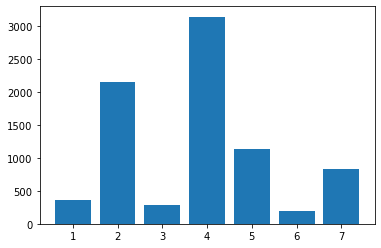

In [19]:
plt.bar(a.index,a)

<BarContainer object of 7 artists>

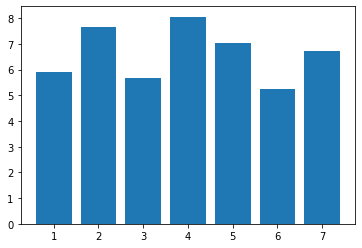

In [20]:
# 큰 편차를 줄여줌... 
# 정규분포화된게 좋은 데이터, 로그 정규분포화시킬때 사용
# 이런 방법도 있다 보여준거, 이번 실습에 적절한 방법은 아님
plt.bar(a.index,np.log(a))

# 5. 모델 선택 및 하이퍼파라미터 튜닝

In [21]:
tree=DecisionTreeClassifier()

# 6. 학습

In [22]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

# 7. 평가

In [23]:
print('train score',tree.score(X_train,y_train))
print('test score',tree.score(X_test,y_test))

train score 1.0
test score 1.0


In [24]:
# tree모델의 특성 중요도 확인하기 (117개 컬럼)
fi=tree.feature_importances_

In [28]:
# None에 원하는 숫자 넣으면 그만큼 출력
# 모든 행 출력
pd.set_option('display.max_rows',None)
# 모든 열 출력
pd.set_option('display.max_columns',None)

In [29]:
# 보기좋게 만들기
# pd.DataFrame(fi,index=X_onehot.columns).sort_values(by=0, ascending=False)
# 특성 중요도는 0~1 사이의 숫자로 이루어짐
# 117개 컬럼의 특성 중요도의 총합은 1
importance_df=pd.DataFrame(fi,index=X_onehot.columns)
importance_df.sort_values(by=0, ascending=False)

,0
odor_n,0.616063
stalk-root_c,0.175846
stalk-root_r,0.089786
spore-print-color_r,0.032861
odor_l,0.023063
odor_a,0.022950
stalk-color-above-ring_w,0.015829
stalk-surface-below-ring_y,0.015508
stalk-root_b,0.005281
cap-shape_c,0.001405


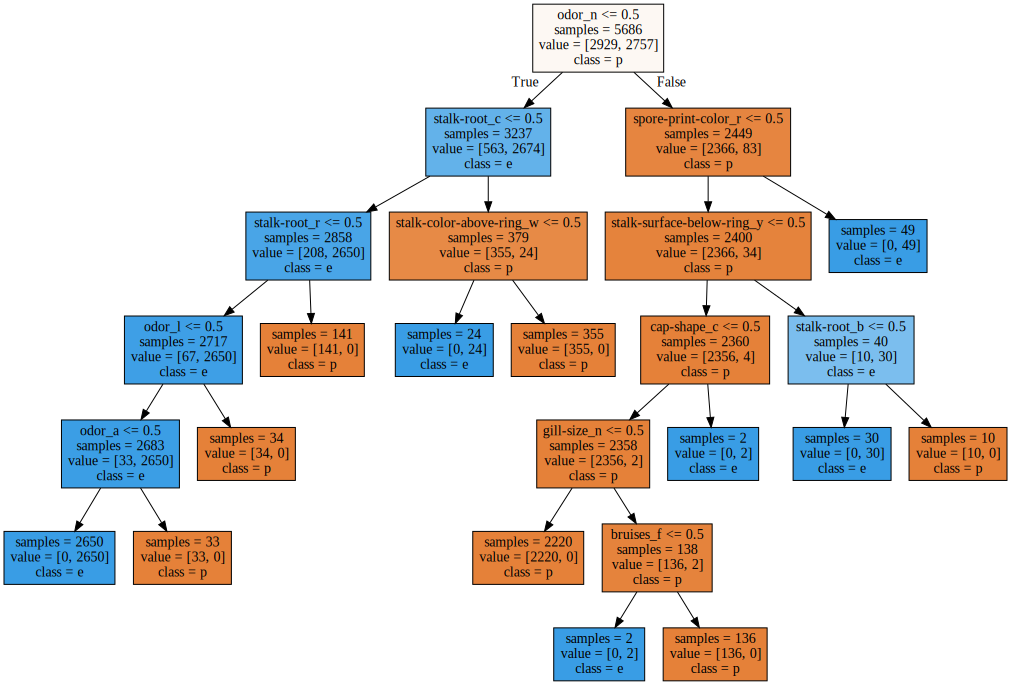

In [30]:
# 시각화

# https://graphviz.gitlab.io/_pages/Download/Download_windows.html 에서
# 2.47.2 EXE installer for Windows 10 (64-bit): 
# stable_windows_10_cmake_Release_x64_graphviz-install-2.47.2-win64.exe
# (not all tools and libraries are included) 다운

# 시스템 속성-환경변수편집-고급-환경변수
# User - Path : C:\Program Files\Graphviz\bin
# System - Path: C:\Program Files\Graphviz\bin\dot.exe
# 등등 필요한 부분 수정

# 아래 시각화 그래프에서
# odor 머시기 = 나눠질 것들은 나눌 질문
# 그 밑에 samples~class = 담긴 데이터
# value = [p,e]
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot',
               class_names=['p','e'],
               feature_names=X_onehot.columns,
               impurity=False,
               filled=True)

import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin'
!pip install graphviz

import graphviz

with open('tree.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [31]:
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

0

# 5.1모델 선택 및 하이퍼파라미터 튜닝
# 6.1
# 7.1

In [35]:
tree = DecisionTreeClassifier(max_depth = 2)

In [36]:
#교차검증
#사용한 모델, 훈련용 문제(X_train), 훈련용정답(y_train), 몇겹 교차 검증을 할건지
#cv = 5이기 때문에 5개의 값이 나옴 = 5겹 교차검증
# 5개의 값이 모두 다름>교차 검증을 진행할때마다 train과 test데이터가변함
#5개의 값을 평균내서 testscore를 예측해 볼 수 있음
#최적의 파라미터를 찾을 수 있음
cross_val_score(tree, X_train, y_train, cv = 5)

array([0.95518453, 0.96130167, 0.9525066 , 0.93931398, 0.95778364])

In [45]:
tree2=DecisionTreeClassifier(max_depth=3)
tree2.fit(X_train,y_train)
print('train score : {}'.format(tree2.score(X_train,y_train)))
print(f'train score : {tree2.score(X_test,y_test)}')
print('train score : ',tree2.score(X_test,y_test))

train score : 0.9857544846992613
train score : 0.9840032813781788
train score :  0.9840032813781788


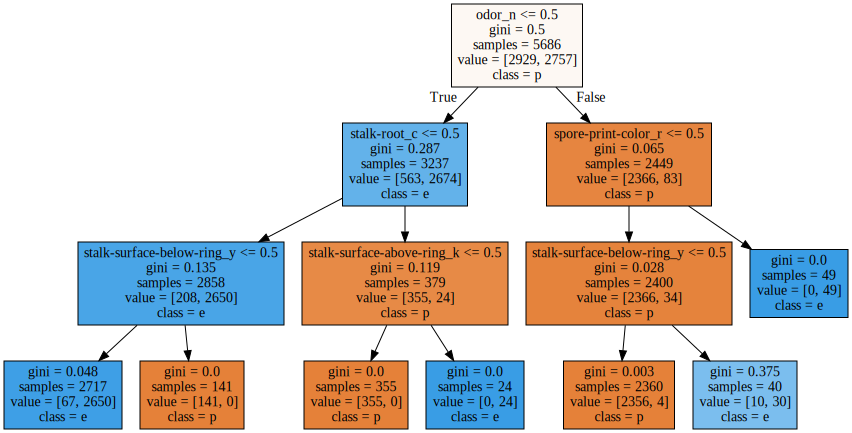

In [46]:
# 시각화
export_graphviz(tree2, out_file='tree2.dot',
               class_names=['p','e'],
               feature_names=X_onehot.columns,
               impurity=True, # gini 출력/미출력 ※ gini불순도: 0,5에 가까워질수록 안 좋고(섞여있음) 0과 1에 가까워질수록 좋음(한쪽으로 몰려서 잘 나눠짐),
               filled=True) # 노드 색깔

os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin'

with open('tree2.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [43]:
check_call(['dot','-Tpng','tree2.dot','-o','tree2.png'])

0

In [37]:
#머신러닝 순서
###1.문제정의 -새로운 데이터에 대한 예측, 판단
#######-기존데이터에서 규칙을 찾아야함
####2.데이터 수집- 정의한 문제를 해결하기 위한 데이터 수집(크롤링, 데이터 포털, 설문지
######3. 데이터 전처리
#-머신러닝을 돌릴 수 있게 데이터를 전처리
#-이상치제거, 결측치제거, 인코딩 )
##4.,탐색적 데이터 분석 - 전처리가 끝난 데이터를 더 깊게 살펴보기
#5.ㅁ모델 선택 및 하이퍼파리미터 튜닝
##-머신러닝 모델 선택(예측을 잘하는 모델,  시간이 덜 걸리는 모델)
##-하이퍼 파라미터 튜닝(예측을 더 잘하게 만들기)
##- 교차검증
#6.학습#7.평가

######분류 회귀
#분류 : 정답의 종류가 정해져 있다- knn, decisiontree
#회귀  : 정답의 종류가 정해져 있지 않음
#정답이 수치형 데이터로 이루어져 있음
#세세한 차이들이 중요하지 않음


#과대적합 괴소적합
#과대적합 : 학습한 결과물(규칙) 훈련데이터에만 맞춰져있어서 예측 데이터에서는 성능을 발휘 하지 못하는현상

#과소적합 : 학습을 많이 시키지 못해서 규칙을 잘 찾지 못함
#훈련 데이터와 예측데이터에서 성능을 발휘하지 못함

#일반화 : 예측데이터의 성능이 가장좋음
# - 훈련데이터의 성능은 과대적합보다 떨어짐
#- 모델을 돌리면서 찾고자 하는 지점]


#모델의 일반화를 유도하는 방법
#-데이터 : 데이터의 양(개수)을 늘리면 됨, 편중된 데이터를 늘리면 안됨
#- 모델 :  모델의 복잡도를 제어(하이퍼 파라미터 튜닝)
#과대적합 피하기> 모델을 덜 복잡하게
#과소 적합  피하기> 모델을 더 복잡하게


# 0 :50 %
#1:50%
#score : 95%
#모든값을 0 으로 예측


#교차검증
# : test에도 과대적합이 걸릴 수 있음 고정되어 있는 test에 평가르르 계속하게 되면
#고정된  test에 맞는 모델과 파라미터가 생김
#살짝 다른 test데이터를 평가하게 되면 성능이 떨어짐

#train validation(검증) test 

#k-fold cross validation
#k겹 교차검증
#전체 데이터를 k 개로 나누고 각각의 데이터를 test한번씩 거치게 해서 총 k번의 학습을 함

#k번의 학습 결과를 평균내서 모델의 score로 활용



#kNN DecisionTree(gini불순도, 엔트로피)

#gini, entropy = impurity (불순도의 지표): 
# 데이터가 섞여있는 걸 수치화 하는 지표



#교차검증